> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-Show Appointment to Medical appointment in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Section 1

### `Introduction`
> As a mandatory part of my Data anayst study, I will be analysing the dataset of patient who had medical appointment with a medical facity in Brazil as recorded in Kaggle.com 
>
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.


>### The dataset to be analsys will address the below question.
 
>1)  What is the ratio of patient that show up for appointment and patient that do not show-up for appointment.
>
>2) The Effect of Age of the patients to the attendance of appointment booked?.
>
>3) What group of sick people are mostly scheduled for appointments. 
>
>4) Does Gender reflect the percentage of patient that show up for appointment?
>
>4) Are SMS notifications associated with lowered incidences of No Shows?
>
>5) If the location of the Neigbourhood is a determinant factor of patient to show or not show-up for appointments
  



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

# Section 2.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
## Load and read the first 5 rows of the csv dataset using the pandas function
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>### Each columes of the dataset contains the below information about the patients to be anaysize. 

> - **patientId:** indicates the patient ID for each patient scheduled for apointment.
>
> - **appointmentID:** indicates appoint ID for each patient.
>
> - **gender:** This shows the gender of each patient schuedled for appointment. either Male (M) or Female (F)
>
> - **scheduledDay:**  This shows the scheduled Date and Time that the patient is set up their appointment.
>
> - **appointmentDay:**  indicates the date/time the patient called to book their appointment.
>
> - **age:**              State the patient's age.
>
> - **neighborhood:**  indicates the location of the patients.
>
> - **scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>
> - **hipertension:** indicates whether or not the patient is experiencing Hypertension.
>
> - **diabetes:**     indicates whether or not the patient is experiencing Diabetes.
>
> - **alcoholism:**   indicates whether or not the patient is experiencing Alcoholism.
>
> - **handcap:**      indicates whether or not the patient is with special needs.
>
> - **sms_received:** indicates whether or not the patient has received a reminder text message.
>
> - **show-up:**      ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>

In [3]:
#View the shape of the dataset to see the numbers of columes and rows
df.shape

(110527, 14)

>The dataset contains 110527 rows (appointments) and 14 columes

In [4]:
# View the dataframe class, range of enteries count and data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for the summary descriptive staticstic of each dataset.
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the Staticstic summary of the dataset, The averge Age "Mean" is 37years old whiile the maximum age is 115year. However, it is observerd that Min Age indicate -1, this does not reflect an actual Age of anyone hence that information contained in the data will be dropped in the data cleaning phase

In [6]:
df.loc[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
#Check for null val in the dataset.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### 2.2 Duplicated Values Validation

In [8]:
#Check for duplicate in the  dataset.
df.duplicated().sum()

0

>The result shows that there are no duplicate values on the entire dataset


In [9]:
#Check for duplicate in the PatientID data colume.
sum(df.PatientId.duplicated())

48228

In [10]:
## Check the values in the PatientId column
df['PatientId'].unique()

array([2.98724998e+13, 5.58997777e+14, 4.26296230e+12, ...,
       7.26331493e+13, 9.96997666e+14, 1.55766317e+13])

In [11]:
#check for duplicates and similar values contained in the PatientId and AppointmentID column
df.duplicated(['PatientId','AppointmentID']).sum()

0

In [12]:
#check for duplicates and similar values contained in the PatientId and ScheduledDay column
df.duplicated(['PatientId','ScheduledDay']).sum()

1334

> The Patient ID colume has a duplicate vaules of 48228. It has a unique entries of 62299 out of the total Patent IDs of 110,527.  This indicate that a Patent may have scheduled their appointment multiples times on the same appointment date. The dataset indicate that despite multiple booking, The Appointment IDs was different. This rules out error of duplicate appointment booking. we will however keep the total patent IDs askey focus is the number of appointments booked and if the patient showed up or not for their appointment. 

In [13]:
#Check for duplicate in the Appointment ID data colume.
df['AppointmentID'].duplicated().sum()

0

In [14]:
#Check for duplicate in the Appointment ID data colume.
df['AppointmentDay'].duplicated().sum()

110500

In [15]:
#check Value unique values for the Handicap colunm
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

> The Handicap column has more entires than other columns of sick people. This will be investigated further when analysing the values of the column


In [16]:
#check Value unique values for the Hipertension colunm
df.Hipertension.unique()

array([1, 0], dtype=int64)

In [17]:
#check Value unique values for the Diabetes colunm
df.Diabetes.unique()

array([0, 1], dtype=int64)

In [18]:
#check Value unique values for the Alcoholism colunm
df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [19]:
# Have a value count of the Appointment day to see the count for repeated values.
df.value_counts(['AppointmentDay'])

AppointmentDay      
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
dtype: int64

In [20]:
#check for duplicates and similar values contained in the PatientId and Appointment Day column
df.duplicated(['PatientId','AppointmentDay']).sum()

8719

> From the above Observation of the Appointment scheduled. There seems to be high number of patients had their appointment day fixed on the same day. Comparing the the PatientId and the AppointmentDay reveals that 8719 patients had there appointment booked multiple times in a date. However each booking has a unique appointment ID which rules out possible for duplicate error. 
The Time stamp was not contained in the dataset hence we can not confirm if this was a case of patient re-boooking their appointment at different time on the same day.



# Section 3.
## Data Cleaning 


In [21]:
# Will drop the index row with the -1 age record to make up for a more realist Age data

df.drop(index=99832 , inplace=True )

In [22]:
#chanege the columes Titles for better presentations.
df.columns = df.columns.str.upper()


In [23]:
#drop columns that are not needed at the analysis
df.drop('PATIENTID', axis=1, inplace=True)
df.drop('APPOINTMENTID', axis=1, inplace=True)


In [24]:
# correct spelling and rename Columns titles 
df.rename(columns = { 'SCHEDULEDDAY': 'SCHEDULED_DAY','HIPERTENSION': 'HYPERTENSION', 'NO-SHOW':'APPOINTMENT_STATUS', 'APPOINTMENTDAY': 'APPOINTMENT_DAY', 'HANDCAP': 'HANDICAP'}, inplace = True)
df.head()

,GENDER,SCHEDULED_DAY,APPOINTMENT_DAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED,APPOINTMENT_STATUS
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
#replace the output for the appointment status colum to show or no show
df.APPOINTMENT_STATUS.replace({'Yes': 'Show','No': 'No_Show'},inplace=True)

In [26]:
#create The datafram for the status report
No_Show =df.APPOINTMENT_STATUS == 'No_Show'
Show =df.APPOINTMENT_STATUS == 'Show'


In [27]:
df[No_Show].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88207 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GENDER              88207 non-null  object
 1   SCHEDULED_DAY       88207 non-null  object
 2   APPOINTMENT_DAY     88207 non-null  object
 3   AGE                 88207 non-null  int64 
 4   NEIGHBOURHOOD       88207 non-null  object
 5   SCHOLARSHIP         88207 non-null  int64 
 6   HYPERTENSION        88207 non-null  int64 
 7   DIABETES            88207 non-null  int64 
 8   ALCOHOLISM          88207 non-null  int64 
 9   HANDICAP            88207 non-null  int64 
 10  SMS_RECEIVED        88207 non-null  int64 
 11  APPOINTMENT_STATUS  88207 non-null  object
dtypes: int64(7), object(5)
memory usage: 8.7+ MB


In [28]:
# Convert AppointmentDay and ScheduledDay from String to DateTime format, and 
# create 2 columns for: appointment booking date and the appointment date.
# Appointment Date
df['APPOINTMENT_DAY']= pd.to_datetime(df['APPOINTMENT_DAY'])
df["APPOINTMENT_DATE"] = df["APPOINTMENT_DAY"]

#Drop appointment day because a new /column has been created with the specific date already contained in those colums
df.drop("APPOINTMENT_DAY",axis=1, inplace = True)

# Appointment Booking Date
df['SCHEDULED_DAY']= pd.to_datetime(df['SCHEDULED_DAY'])
df["SCHEDULED_DATE"] = df["SCHEDULED_DAY"]

#Drop the scheduled day 
df.drop("SCHEDULED_DAY",axis=1, inplace = True)

In [29]:
df.info ('APPOINTMENT_STATUS')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   GENDER              110526 non-null  object             
 1   AGE                 110526 non-null  int64              
 2   NEIGHBOURHOOD       110526 non-null  object             
 3   SCHOLARSHIP         110526 non-null  int64              
 4   HYPERTENSION        110526 non-null  int64              
 5   DIABETES            110526 non-null  int64              
 6   ALCOHOLISM          110526 non-null  int64              
 7   HANDICAP            110526 non-null  int64              
 8   SMS_RECEIVED        110526 non-null  int64              
 9   APPOINTMENT_STATUS  110526 non-null  object             
 10  APPOINTMENT_DATE    110526 non-null  datetime64[ns, UTC]
 11  SCHEDULED_DATE      110526 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns

In [30]:
#convert Schedule_Date and Appointment_DATE to datatime dtype
df['SCHEDULED_DATE']= pd.to_datetime(df['SCHEDULED_DATE'])
df['APPOINTMENT_DATE']= pd.to_datetime(df['APPOINTMENT_DATE'])

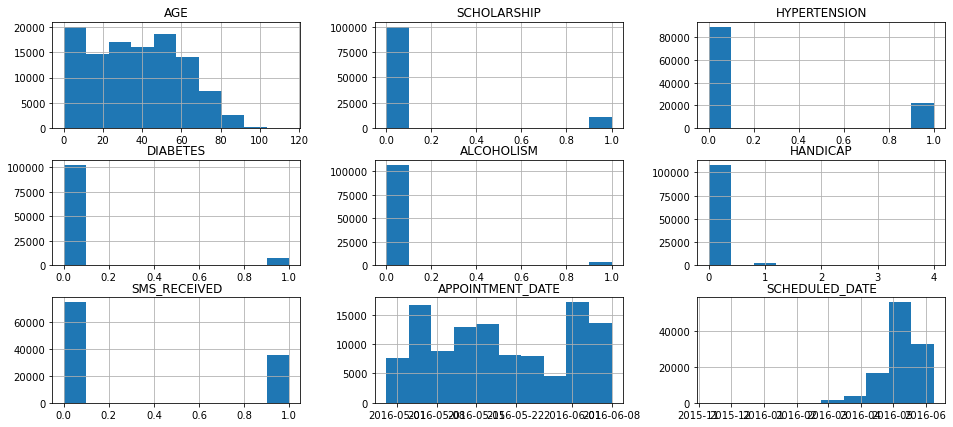

In [31]:
#view the histogram of the entire data.
df.hist(figsize= (16,7));

## Section 4

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### First step is to create functions to be used to calcuate our finding.



In [32]:
#define function to calcualte the Value count of some variables using bar chart
def v_count_calulation( vari):
    df_pie = df[vari].value_counts()
    plt = df_pie.plot.pie(figsize=(5,5),autopct='%1.2f%%', explode=(0., .05), fontsize = 12);
    plt.set_title(vari + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)



### Research Question 1 : What is the ratio of patient that show up for appointment and patient that do not show-up for appointment.

>Questions

>What is the overall ratio of appointment show-up vs. no show-up rate?
We will conduct a process of get the percentage of patient that showed up and did not show up for their apppointment
>

In [33]:
#Do a value count of the appointment status to get the count of both the patients that showup and those that didnt.
df.APPOINTMENT_STATUS.value_counts()

No_Show    88207
Show       22319
Name: APPOINTMENT_STATUS, dtype: int64

In [34]:
#get the mean value for the appointment status and the max
df[No_Show].mean(numeric_only=True),df[Show].mean(numeric_only=True)

(AGE             37.790504
 SCHOLARSHIP      0.093904
 HYPERTENSION     0.204394
 DIABETES         0.073838
 ALCOHOLISM       0.030417
 HANDICAP         0.022742
 SMS_RECEIVED     0.291337
 dtype: float64,
 AGE             34.317667
 SCHOLARSHIP      0.115507
 HYPERTENSION     0.169004
 DIABETES         0.064071
 ALCOHOLISM       0.030333
 HANDICAP         0.020297
 SMS_RECEIVED     0.438371
 dtype: float64)

No_Show    79.81
Show       20.19
Name: APPOINTMENT_STATUS, dtype: float64

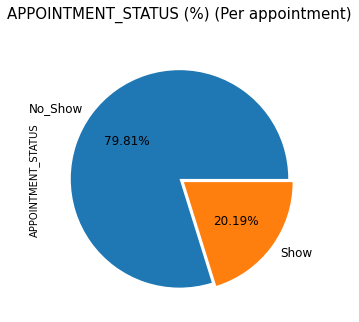

In [35]:
#Using the Def for value count to get the pie for the appointment status
v_count_calulation('APPOINTMENT_STATUS')


> Looking at the above chart, we find that patient didnt show up for a large pecentage of the appointment booked. Only a 25% of the scheduled appointment by paitent were kept while,Patient didnt show up for  79.81% appointment scheduled. 

### Research Question 2:  The Effect of Age of the patients to the attendance of appointment booked


In [36]:
#get the statistic of the Age colume
df.AGE.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: AGE, dtype: float64

Patient that show up for Appointments Mean Age:34.32
Patient that didnt show up forAppointments Mean Age:37.79


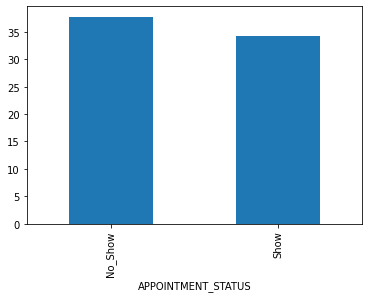

In [37]:
#Get the mean age of patients that showed up and those that didnt
df.groupby('APPOINTMENT_STATUS')['AGE'].mean().plot(kind= 'bar');

print('Patient that show up for Appointments Mean Age:{:.2f}'.format(df[Show].AGE.mean()))
print('Patient that didnt show up forAppointments Mean Age:{:.2f}'.format(df[No_Show].AGE.mean()))

> The analysis shows that the average age a paient scheduled for the appointment is 37 year of age and an average of age of the patient that showed up for their appointment. 
>This implys that most of the patient scheudled for the medical appointment are mid-ages of between 30-60years old. with the max age been 115years.

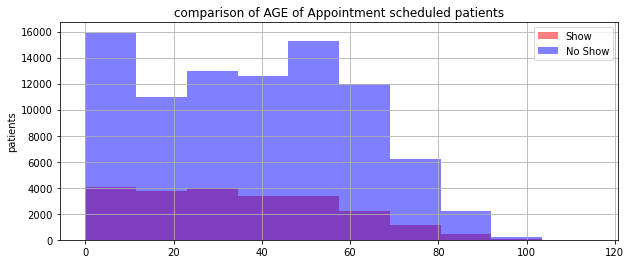

In [38]:
#compare data from Age to the appointment scheduled patients
def compare_data(df,section,show,noshow):
    plt.figure(figsize=(10,4))
    df[Show].AGE.hist(alpha=0.5, bins=10, color= 'Red',label='Show')
    df[No_Show].AGE.hist(alpha=0.5, bins=10,color= 'Blue', label='No Show')
    plt.legend();
    plt.title('comparison of AGE of Appointment scheduled patients')
    plt.ylabel('patients')
    plt.legend();
compare_data(df,'AGE',Show,No_Show)

> The analysis shows that majority most patient that showed up for their appointment are between the age 0-10years old. while the least age that didnt show up for the appoint are within the Age 80-100 years old. 
> This may be beacuse infant from 0-10years old require adequate attention in their young years. 


 ### Research Question 3:  What group of sick people are mostly secheduled for appointments.

In [39]:
# the highest correlation is for hypertension and age, hypertension and diabetes, and diabetes and age
df.corr().style.background_gradient(axis=None,cmap='Greens')

,AGE,SCHOLARSHIP,HYPERTENSION,DIABETES,ALCOHOLISM,HANDICAP,SMS_RECEIVED
AGE,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
SCHOLARSHIP,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
HYPERTENSION,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
DIABETES,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
ALCOHOLISM,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
HANDICAP,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
SMS_RECEIVED,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


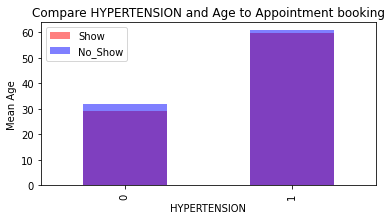

In [40]:
#mean age of patients with HYPERTENSION  and if they showed up
plt.figure(figsize=(6,3))
df[Show].groupby('HYPERTENSION').mean()['AGE'].plot(kind='bar',color='red',alpha =0.50,label='Show')
df[No_Show].groupby('HYPERTENSION').mean()['AGE'].plot(kind='bar',color='blue',alpha =0.50,label='No_Show')
plt.legend()
plt.legend()
plt.title( 'Compare HYPERTENSION and Age to Appointment booking')
plt.xlabel('HYPERTENSION')
plt.ylabel('Mean Age');


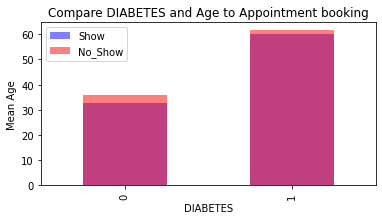

In [41]:
#mean age of patients with DIABETES  and if they showed up
plt.figure(figsize=(6,3))
df[Show].groupby('DIABETES').mean()['AGE'].plot(kind='bar',color='blue',alpha =0.50,label='Show')
df[No_Show].groupby('DIABETES').mean()['AGE'].plot(kind='bar',color='red',alpha =0.50,label='No_Show')
plt.legend()
plt.title( 'Compare DIABETES and Age to Appointment booking')
plt.xlabel('DIABETES')
plt.ylabel('Mean Age')
plt.show()

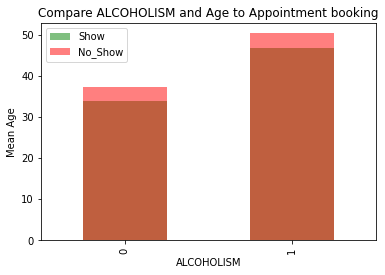

In [42]:
#mean age of patients with alcoholism and if they showed up
df[Show].groupby('ALCOHOLISM').mean()['AGE'].plot(kind='bar',color='green',alpha =0.50,label='Show')
df[No_Show].groupby('ALCOHOLISM').mean()['AGE'].plot(kind='bar',color='red',alpha =0.50,label='No_Show')
plt.legend()
plt.title( 'Compare ALCOHOLISM and Age to Appointment booking')
plt.xlabel('ALCOHOLISM')
plt.ylabel('Mean Age');


>After analysing the apppointment status of patients per age, It indicate that illness doesnt significaely   has any effect to the patients that showed up and those that didnt. The patients seems to be bewteen the age 30-60 years of age


### Research Question 4: Does Gender reflect the percentage of patient that show up for appointment?


In [43]:
#Do a value count to get the number of appointmnet that are booked by (F) female and those booked by male(M)
df.GENDER.value_counts()


F    71839
M    38687
Name: GENDER, dtype: int64

In [44]:
#Check the average ages of the most gender that showed up for their appointment and those that didnt
df[No_Show].groupby('GENDER')['AGE'].mean(),df[Show].groupby('GENDER')['AGE'].mean()


(GENDER
 F    39.591126
 M    34.461372
 Name: AGE, dtype: float64,
 GENDER
 F    36.16219
 M    30.83301
 Name: AGE, dtype: float64)

F    65.0
M    35.0
Name: GENDER, dtype: float64

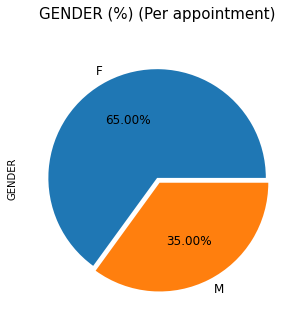

In [45]:
#Show a visual display of the gender count
v_count_calulation('GENDER')

In [46]:
df.groupby('APPOINTMENT_STATUS').GENDER.count()

APPOINTMENT_STATUS
No_Show    88207
Show       22319
Name: GENDER, dtype: int64

### Research Question 4: Are SMS notifications associated with lowered incidences of No Shows?

In [47]:
df.SMS_RECEIVED.value_counts()

0    75044
1    35482
Name: SMS_RECEIVED, dtype: int64

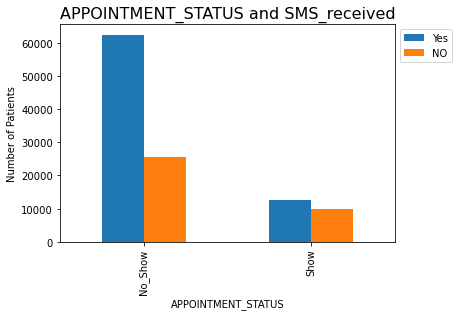

In [48]:
# Plot a bar graph based on groupby data
yesno = {1:'Yes', 0:'No'}
df.groupby(['APPOINTMENT_STATUS','SMS_RECEIVED']).size().unstack(fill_value=0).plot.bar()
plt.legend(["Yes", "NO"],loc='center left', bbox_to_anchor=(1, 0.9))
plt.title('APPOINTMENT_STATUS and SMS_received', fontsize = 16)
plt.xlabel('APPOINTMENT_STATUS', fontsize=10,)
plt.ylabel('Number of Patients', fontsize=10,)
plt.show();

>The percentage of no shows is much higher when SMS messages were received. The indicate that the sms sent did not improved the number of patients that shows up for the appointment

### Research Question 4: If the location of the Neigbourhood is a determinant factor of patient to show or not show-up for appointments

In [49]:
df.NEIGHBOURHOOD.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: NEIGHBOURHOOD, Length: 81, dtype: int64

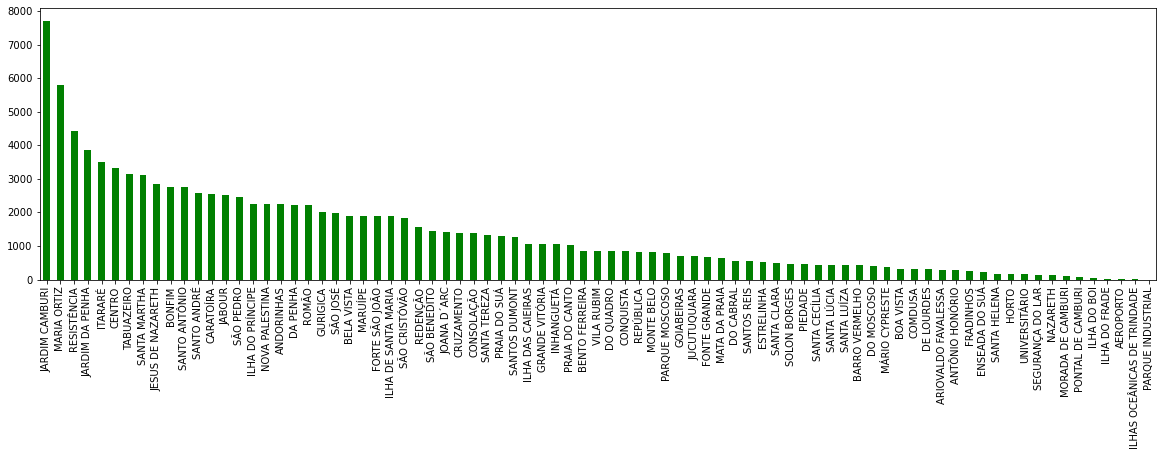

In [50]:
df.NEIGHBOURHOOD.value_counts().plot(kind="bar",figsize=(20,5),color='green');

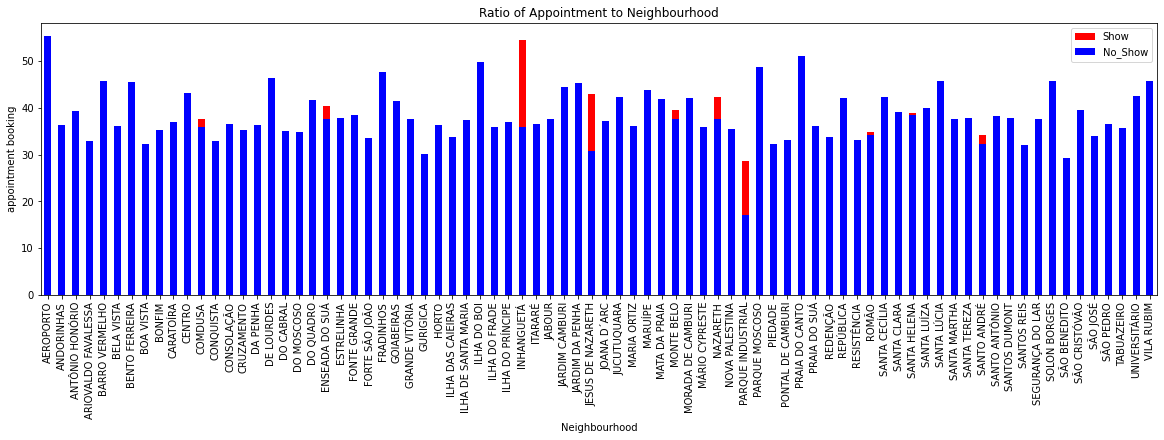

In [51]:
#check for the appointment status of patient per neighbourhood and age of the patients
df[Show].groupby('NEIGHBOURHOOD').AGE.mean().plot(kind="bar",stacked=True,figsize=(20,5),color='red',label='Show');
df[No_Show].groupby('NEIGHBOURHOOD').AGE.mean().plot(kind="bar",stacked=True,figsize=(20,5),color='blue',label='No_Show');
plt.legend()
plt.title('Ratio of Appointment to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('appointment booking');
plt.show()

<a id='conclusions'></a>
## Conclusions

> The analysis of the dataset and  relationships between variables.indicate that most patients  appointment which correlated with No show appointment status despite the difference in the illness of the patients. A high %79.81 of appointment booked didnt. 
>
>It was also noticed that the number of illness wasnt significant in patients showing up for their appointment
>
>It was also observed that sending SMs to the paitents didnt help improve the attendance.
>
>The neighborhoods with most patients showing up for their appointments have low patients numbers. So, we couldn't conclude that these neighborhoods have a higher chance that patients won't miss their appointments.